In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Total US data

In [2]:
df = pd.read_csv('../data/clean_data/merged_df.csv')

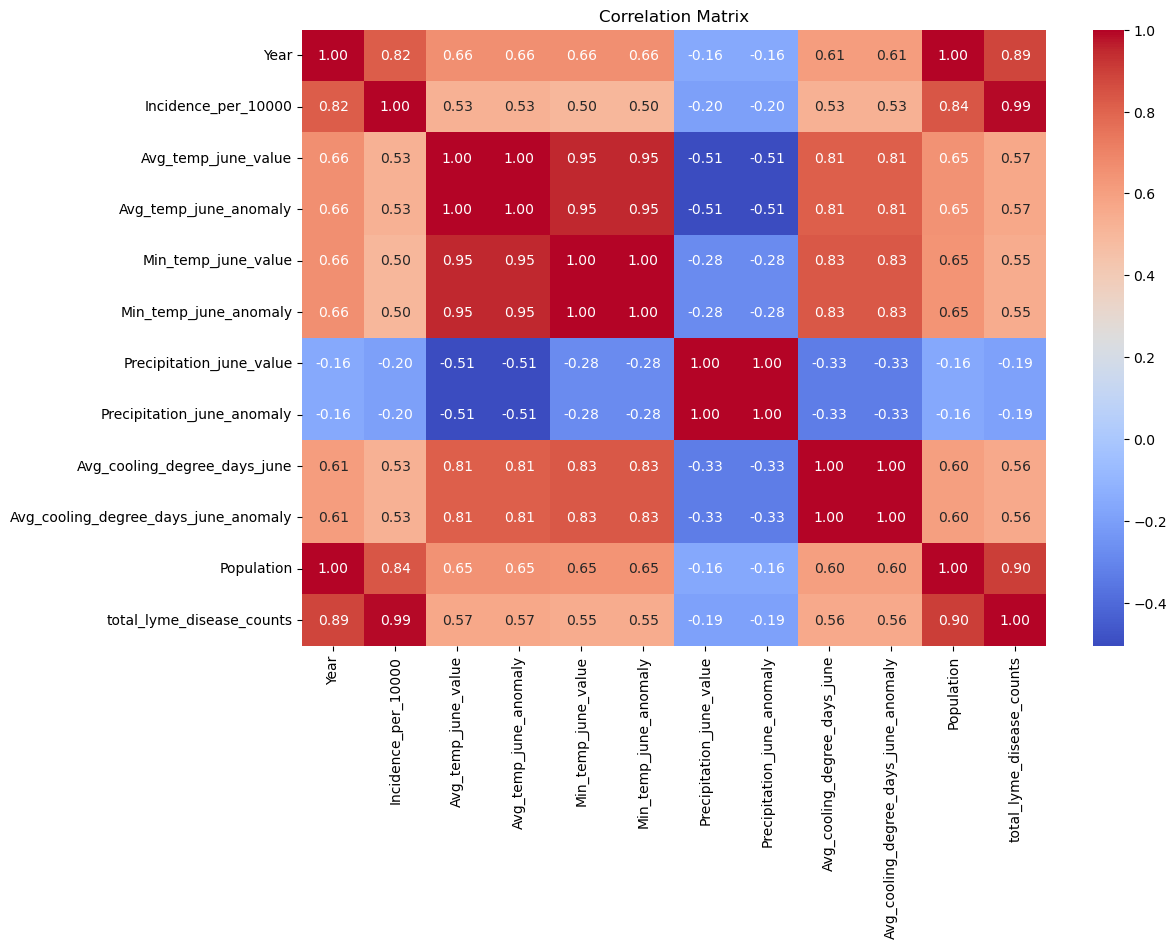

In [3]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

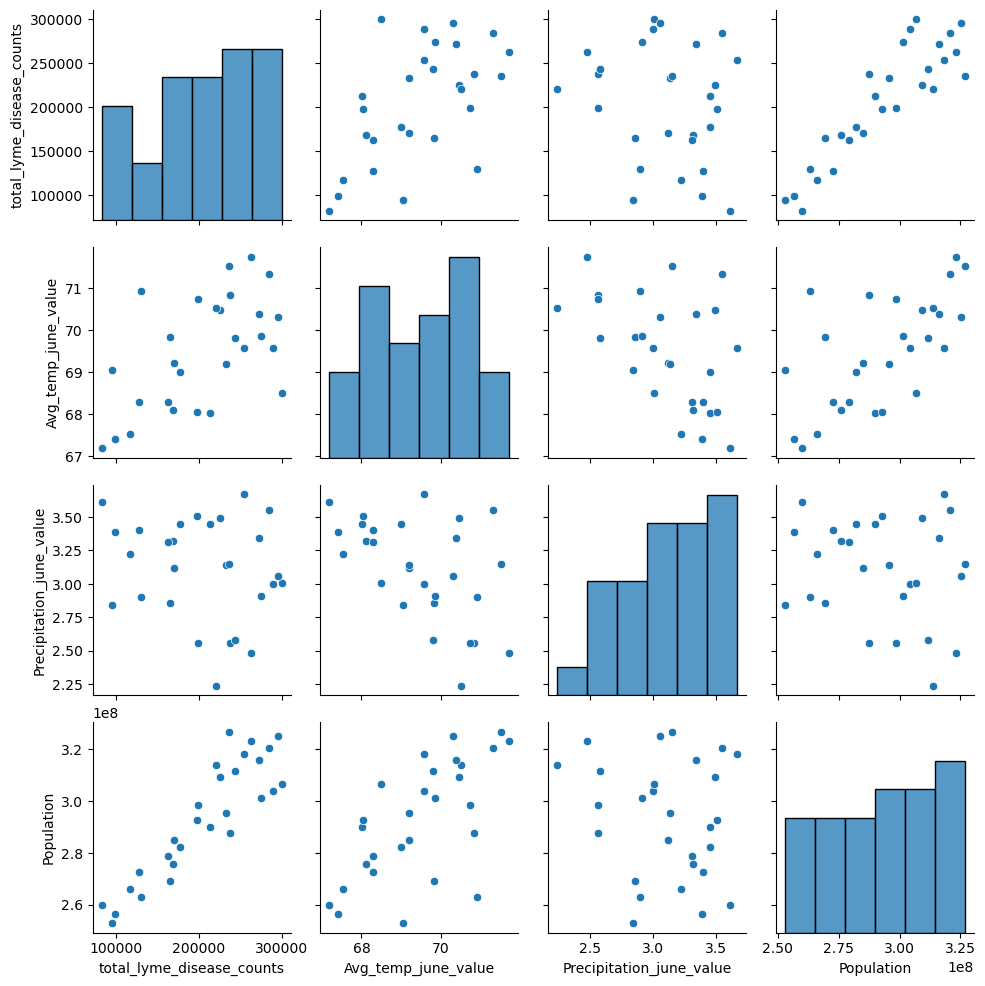

In [4]:
# Pairplot for key variables
sns.pairplot(df, 
             vars=["total_lyme_disease_counts", "Avg_temp_june_value", 
                   "Precipitation_june_value", "Population"])
plt.show()


## State data

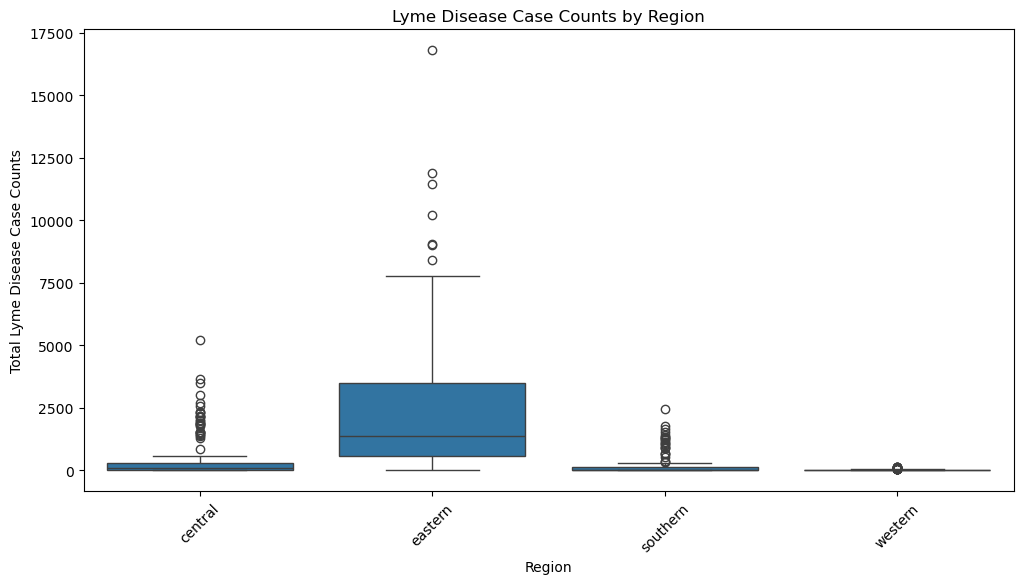

In [4]:

df = pd.read_csv('../data/clean_data/state_data.csv')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='Lyme_cases')
plt.title('Lyme Disease Case Counts by Region')
plt.xlabel('Region')
plt.ylabel('Total Lyme Disease Case Counts')
plt.xticks(rotation=45)
plt.show()

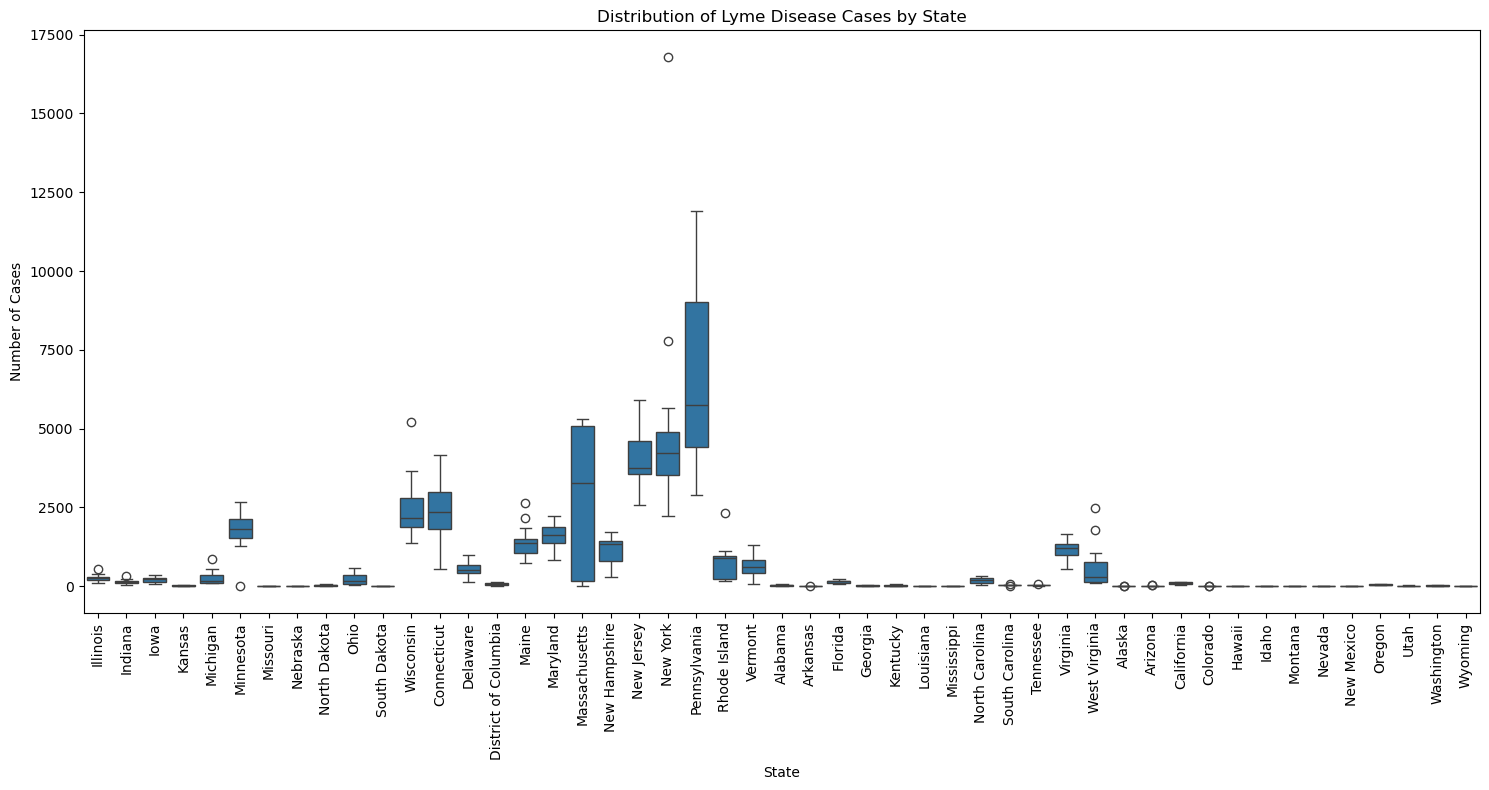

In [5]:
# Boxplot - Lyme disease by state
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='State', y='Lyme_cases')
plt.title('Distribution of Lyme Disease Cases by State')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['Year', 'Precipitation_avg', 'region', 'Min_temp_avg', 'Avg_temp',
       'State', 'Lyme_cases', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness', 'state_park_land_coverage', 'state_park_rank'],
      dtype='object')

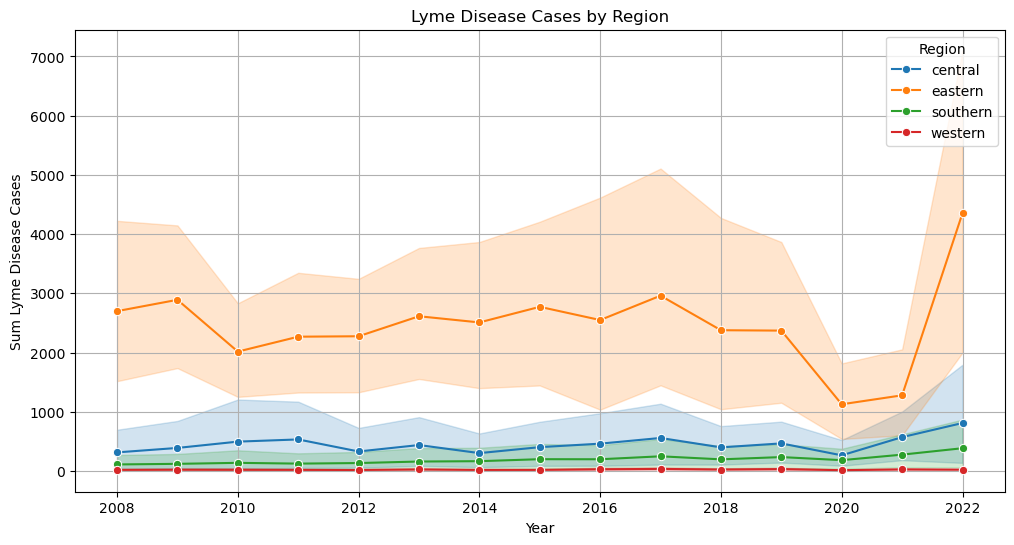

In [7]:
region_sum = df.groupby(['Year', 'region', 'Min_temp_avg', 'Avg_temp', 'Precipitation_avg', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness', 'state_park_land_coverage', 'state_park_rank'])['Lyme_cases'].sum().reset_index()

# line plot: 
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sum, x='Year', y='Lyme_cases', hue='region', marker='o')
xticks = range(int(region_sum['Year'].min()), int(region_sum['Year'].max()) + 1, 2)
plt.xticks(ticks=xticks)
plt.title('Lyme Disease Cases by Region')
plt.xlabel('Year')
plt.ylabel('Sum Lyme Disease Cases')
plt.legend(title='Region')
plt.grid(True)
plt.show()

                                  Year  Min_temp_avg  Avg_temp  \
Year                      1.000000e+00      0.050247  0.067689   
Min_temp_avg              5.024703e-02      1.000000  0.974922   
Avg_temp                  6.768879e-02      0.974922  1.000000   
Precipitation_avg        -3.966188e-02      0.420335  0.226334   
Total_Land_Area          -7.222795e-15     -0.554274 -0.415387   
Tree_Cover_Loss          -6.405017e-03      0.394219  0.473169   
species_richness          1.567941e-15      0.674048  0.655180   
state_park_land_coverage -1.090202e-15     -0.094124 -0.116603   
state_park_rank          -4.005515e-16      0.146502  0.178526   
Lyme_cases                1.663794e-02      0.022363 -0.075112   

                          Precipitation_avg  Total_Land_Area  Tree_Cover_Loss  \
Year                              -0.039662    -7.222795e-15        -0.006405   
Min_temp_avg                       0.420335    -5.542739e-01         0.394219   
Avg_temp                      

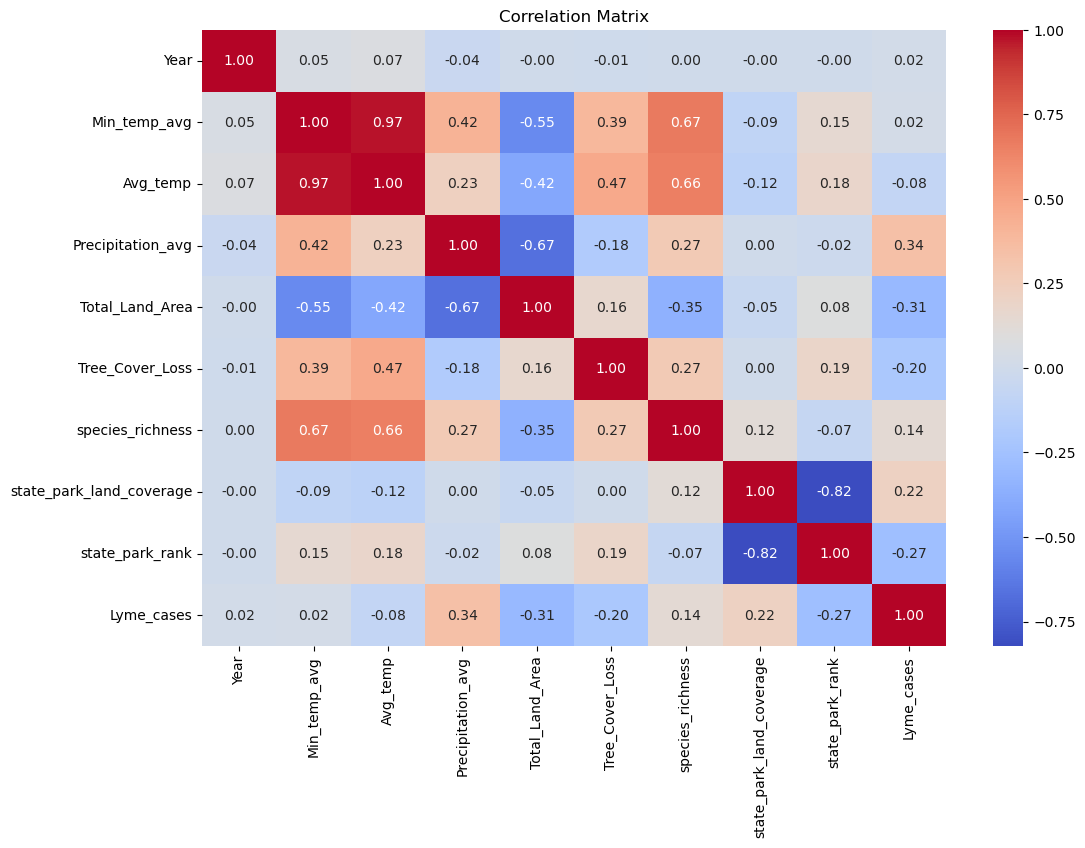

In [8]:

numeric_df = region_sum.drop('region', axis=1)

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# visualize correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()